In [ ]:
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import numpy as np

import torch

In [19]:
image = cv2.imread("../input/image.png")
image_array = image.reshape((image.shape[0] * image.shape[1], 3))

In [20]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [21]:
kmeans.fit(image_array)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [31]:
color_map = {
    2: np.array([0.6, 0.196, 0.8]),  # purple
    0: np.array([1, 1, 1]),  # white
    1: np.array([0.43, 0.67, 1.0]),  # blue
    3: np.array([0.93, 0.68, 1]),  # pink
}

def show_image(labels_array: np.ndarray, color_map: dict[int, np.ndarray]=color_map):
    data_reshaped = labels_array.reshape(image.shape[0], image.shape[1])
    data_colorcoded = np.ndarray(
        shape=(
            data_reshaped.shape[0],
            data_reshaped.shape[1],
            3,
        ),
        dtype=float,
    )
    for i in range(0, data_reshaped.shape[0]):
        for j in range(0, data_reshaped.shape[1]):
            data_colorcoded[i][j] = color_map[data_reshaped[i][j]]

    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(data_colorcoded)

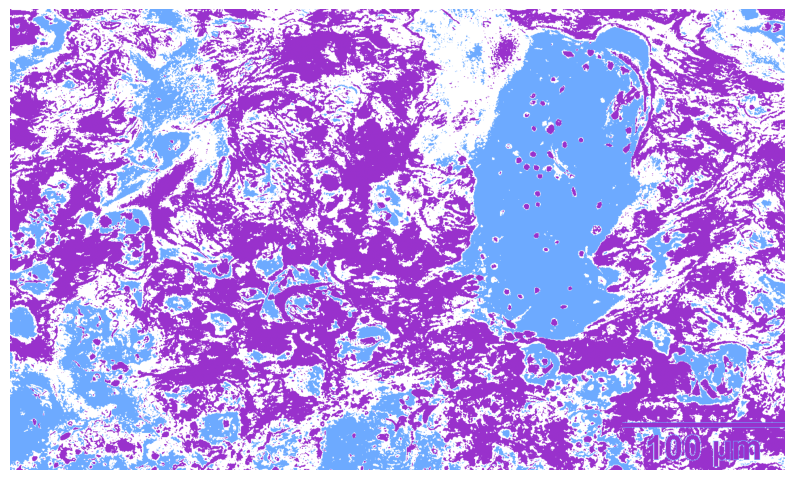

In [32]:
show_image(kmeans.labels_)

In [33]:
kmeans.cluster_centers_

array([[173.59437861,  97.24248702, 155.48868932],
       [219.78614989, 184.79939185, 192.30745034],
       [131.00643673,  37.55849125,  99.61622342]])

In [34]:
center_of_interest = kmeans.cluster_centers_[1]

In [35]:
_, counts = np.unique(kmeans.labels_, return_counts=True)

In [36]:
counts[1]

np.int64(296194)

In [37]:
counts[1] / counts.sum() > 0.1

np.True_

In [38]:
image_array_as_torch = torch.from_numpy(image_array).float()


In [39]:
centroids = image_array_as_torch[torch.randperm(image_array_as_torch.size(0))[:3]]

num_iterations = 100

for _ in range(num_iterations):
    distances = torch.cdist(image_array_as_torch, centroids)

    _, labels = torch.min(distances, dim=1)

    for i in range(4):
        if torch.sum(labels == i) > 0:
            centroids[i] = torch.mean(image_array_as_torch[labels == i], dim=0)

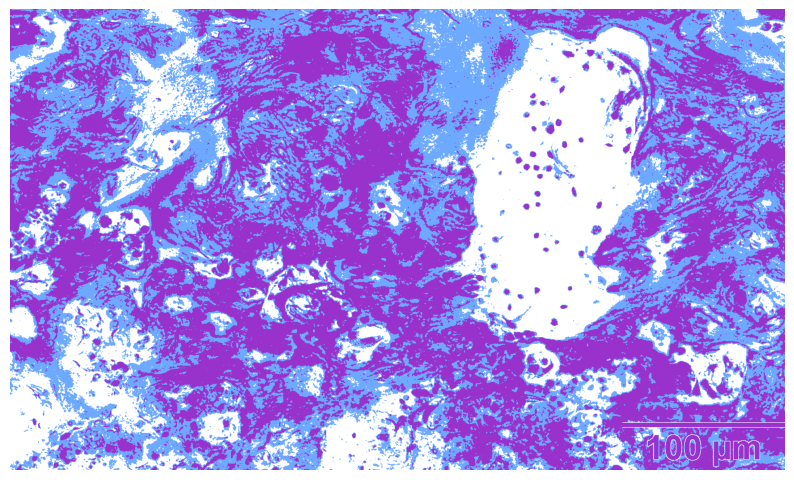

In [41]:
show_image(labels.numpy())